In [1]:
import pickle
import pandas as pd
import numpy as np
from psm_causal_effects import psm_causal_effects

graph = True
figDir = 'figs'
treatment = 'quality'
outcome = 'mood';
confound = ['duration','mood_prev','stress_prev','energy_prev','focus_prev','activity_prev','daytype_prev']

# read data
with open('data.dat') as f:
    data = pickle.load(f)
f.close()

# removing nan rows
for i in range(len(data)):
    data[i] = data[i].dropna()
    data[i] = data[i].reset_index(drop=True)
    
# removing empty subjects
ind_empty = []
for i in range(len(data)):
    if data[i].shape[0]==0:
        ind_empty.append(i)
data = [i for j, i in enumerate(data) if j not in ind_empty]
print str(len(ind_empty))+' subjects removed due to lack of data'

21 subjects removed due to lack of data


In [3]:
n_boot = 100

ind_set = range(len(data))

es_mean = np.array([])
for k in range(n_boot):
    
    print k,
    
    inds = np.random.choice(ind_set, size=len(data), replace=True)

    es = np.array([])
    for i in inds:

        treatment = np.array(data[i]['mood_prev'])
        outcome = np.array(data[i]['quality'])
        confound = np.array(pd.concat([data[i]['quality_prev'],data[i]['stress_prev']],axis=1))

        es = np.append(es,psm_causal_effects(treatment=treatment, outcome=outcome, confound=confound, scorefun='replacement'))

    es_mean = np.append(es_mean, np.mean(es))
    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99


0.127302098601


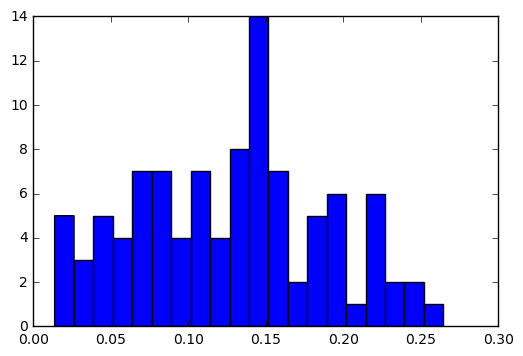

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print np.mean(es_mean)
plt.hist(es_mean,20);

In [ ]:
es

In [ ]:
from psm_causal_effects import psm_causal_effects

treatment, confound, model = psm_causal_effects(, , )